# ISLR Chapter 4: Classification

## Lab exercises

In [1]:
'''
references:
JWarmenhoven: https://github.com/JWarmenhoven/ISLR-python/blob/master/Notebooks/
collinprather: https://github.com/collinprather/ISLR-Python
Jliu: https://github.com/0liu/ISLR
http://www.science.smith.edu/~jcrouser/SDS293/labs/lab4-py.html
http://www.science.smith.edu/~jcrouser/SDS293/labs/lab3-py.html
'''

# Standard imports
import pandas as pd
import numpy as np

# StatsModels
import statsmodels.api as sm
import statsmodels.formula.api as smf

# scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix, classification_report

# Visualization
from IPython.display import display
import statsmodels.graphics.api as smg
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-white')

'\nreferences:\nJWarmenhoven: https://github.com/JWarmenhoven/ISLR-python/blob/master/Notebooks/\ncollinprather: https://github.com/collinprather/ISLR-Python\nJliu: https://github.com/0liu/ISLR\n'

## Lab 4.6.1 Stock Market Data

In [28]:
# Import Smarket dataset from local csv file
df_stock = pd.read_csv('data/Smarket.csv', index_col = 0, parse_dates=True)
df_stock.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [29]:
df_stock.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


In [30]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250 entries, 1 to 1250
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1250 non-null   int64  
 1   Lag1       1250 non-null   float64
 2   Lag2       1250 non-null   float64
 3   Lag3       1250 non-null   float64
 4   Lag4       1250 non-null   float64
 5   Lag5       1250 non-null   float64
 6   Volume     1250 non-null   float64
 7   Today      1250 non-null   float64
 8   Direction  1250 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 97.7+ KB


In [31]:
# to check for multi-collinearity when doing multiple regression
df_stock.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


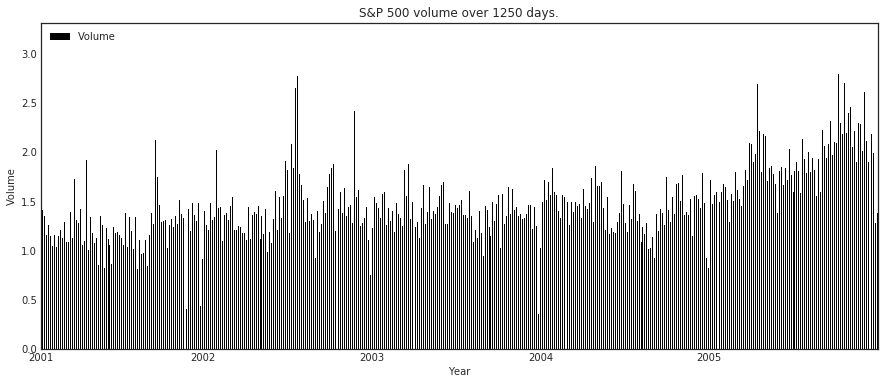

In [32]:
# Plot Smarket volumes
ax = df_stock.plot('Year', 'Volume', kind='bar', figsize=(15,6), color='k')

# Remove redundant xtick labels
xticklabels = ['',] * df_stock.shape[0]
xtext, xlocs = np.unique(df_stock.Year, return_index=True)
for t, i in zip(xtext, xlocs):
    xticklabels[i] = str(int(t))
ax.set_xticklabels(xticklabels, rotation=0)
 
ax.set_ylabel('Volume')
ax.set_title('S&P 500 volume over 1250 days.')
plt.show()

## Lab 4.6.2 Logistic Regression

### Statsmodels
To run a logistic regression we use the generalized linear model and pass the argument $\color{brown}{family = sm.families.Binomial()}$ to tell the program to run logistic regression rather than some other type of generalized linear model. In GLM, the model will try to maximize the likelihood. Or equivalent to finding parameters that minimize the $\color{red}{deviance}$. Deviance is a measure of model fit, like residual sum-of-squares (RSS) in linear regression.

A large residual deviance suggests a bad fit. Ways to correct this:
 * include correct predictors
 * transform predictors appropriately
 * detect outliers or points with high influence using residual plots
 * add sample size (if sample for one class, $n_i$, is too small).

Reference: http://www.science.smith.edu/~jcrouser/SDS293/labs/2016/lab4/Lab%204%20-%20Logistic%20Regression%20in%20Python.pdf

In [33]:
# Logistic regression by GLM
formula = 'Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume'
smarket_glm = smf.glm(formula, data=df_stock, family=sm.families.Binomial()).fit() 

print('Deviance Residuals:')
display(smarket_glm.resid_deviance.describe())
print(smarket_glm.summary())
print('\n    Null deviance: {0:.1f} on {1} degrees of freedom'.format(smarket_glm.null_deviance, smarket_glm.df_model+smarket_glm.df_resid))
print('Residual deviance: {0:.1f} on {1} degrees of freedom'.format(smarket_glm.deviance, smarket_glm.df_resid))
print('AIC: {0:.2f}'.format(smarket_glm.aic))                

Deviance Residuals:


count    1250.000000
mean       -0.012030
std         1.176023
min        -1.325832
25%        -1.145081
50%        -1.065292
75%         1.203130
max         1.446343
dtype: float64

                          Generalized Linear Model Regression Results                           
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                 1250
Model:                                              GLM   Df Residuals:                     1243
Model Family:                                  Binomial   Df Model:                            6
Link Function:                                    logit   Scale:                          1.0000
Method:                                            IRLS   Log-Likelihood:                -863.79
Date:                                  Sat, 02 May 2020   Deviance:                       1727.6
Time:                                          10:55:50   Pearson chi2:                 1.25e+03
No. Iterations:                                       4                                         
Covariance Type:                              nonrobust                                         
                 coef    std e

In [34]:
smarket_glm.model.endog_names

['Direction[Down]', 'Direction[Up]']

The smallest p-value here is associated with **Lag1**. The negative coefficient for this predictor suggests that if the market had a positive return yesterday, then it is less likely to go up today. However, **at a value of 0.145, the p-value is still relatively large**, and so there is no clear evidence of a real association between Lag1 and Direction.

We use the .params attribute in order to access just the coefficients for this fitted model. Similarly, we can use .pvalues to get the p-values for the coefficients, and .model.endog_names to get the endogenous (or dependent) variables. Note that the dependent variable has been converted from nominal into two dummy variables ['Direction[Down]', 'Direction[Up]']

The **predict()** function can be used to predict the probability that the market will go down, given values of the predictors. If no data set is supplied to the predict() function, then the probabilities are computed for the training data that was used to fit the logistic regression model.

In [35]:
predictions = smarket_glm.predict()
print(predictions[0:10])
# values correspond to the probability that the market will go down, rather than up. 
# as Python created a dummy variable with 1 for Down

[0.49291587 0.51853212 0.51886117 0.48477764 0.48921884 0.49304354
 0.50734913 0.49077084 0.48238647 0.51116222]


In [41]:
print(np.column_stack((df_stock["Direction"], smarket_glm.model.endog))) # check if 0 refers to Up or Down

[['Up' 0.0]
 ['Up' 0.0]
 ['Down' 1.0]
 ...
 ['Up' 0.0]
 ['Down' 1.0]
 ['Down' 1.0]]


Transforming the all elements which predicted probability exceeds 0.5 to Down, otherwise Up. Confusion matrix can be created using these binary predictions. 

In [43]:
predictions_nominal = ["Up" if x < 0.5 else "Down" for x in predictions]

from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(df_stock['Direction'], predictions_nominal))

[[145 457]
 [141 507]]


The diagonal elements of the confusion matrix indicate correct predictions. Our model correctly predicted the market would go up on 507 days and that it would go down on 145 days for a total of 507 + 145 = 652 correct predictions. 

In [44]:
print(classification_report(df_stock["Direction"], 
                            predictions_nominal, 
                            digits = 3))

              precision    recall  f1-score   support

        Down      0.507     0.241     0.327       602
          Up      0.526     0.782     0.629       648

    accuracy                          0.522      1250
   macro avg      0.516     0.512     0.478      1250
weighted avg      0.517     0.522     0.483      1250



By checking the output of **classification_report()** function, we can check that the accuracy of the model is 0.522. 

It may appear that the logistic regression model is working slightly better than random guessing. But this is misleading as we tested the model on the training data. So this is the training error rate. We need to use unseen data to check the test error rate which is more representative of model performance. 

In [46]:
# Split the data by year. Training set is from 2001 to 2004. Test set is 2005.
x_train = df_stock.loc[df_stock['Year'] <= 2004, :]
y_train = df_stock.loc[df_stock['Year'] <= 2004, 'Direction']

x_test = df_stock.loc[df_stock['Year'] >= 2005, :]
y_test = df_stock.loc[df_stock['Year'] >= 2005, 'Direction']

In [47]:
# Fit a regression model using only the subset of observations prior to 2005
model = smf.glm(formula = formula, 
                data = x_train, 
                family = sm.families.Binomial())
result = model.fit()

Computing predictions using predictors in the test set and comparing the output to the actual movements of market, y_test:

In [48]:
# Compute predictions using x_test, and comparing result to y_test
predictions = result.predict(x_test)
predictions_nominal = [ "Up" if x < 0.5 else "Down" for x in predictions]
print(classification_report(y_test, 
                            predictions_nominal, 
                            digits = 3))

              precision    recall  f1-score   support

        Down      0.443     0.694     0.540       111
          Up      0.564     0.312     0.402       141

    accuracy                          0.480       252
   macro avg      0.503     0.503     0.471       252
weighted avg      0.511     0.480     0.463       252



Results are rather disappointing as the accuracy is $\color{red}{48\%}$ or worse than random guessing. Not surprising as one is not expected to predict future market performance using previous day's returns. We can probably get better results by removing predictors with the smallest p-values. 

**Using predictors with no relationship with the response tends to cause deterioration in the accuracy** (such predictors increase the variance without a decrease in bias). In this example, we can try to refit the logistic regression using just Lag1 and Lag2, which seems to have the highest predictive power in the original model. 

If we want to predict the returns associated with **particular values of predictors** (i.e. Lag1 to Lag5, and Volume), we can do this by passing a new data frame containing our test values to the predict() function

In [49]:
print(result.predict(pd.DataFrame([[1.2, 1.1, 1.0, 0.9, 1.3, 0.4], 
                                   [1.5, -0.8, -0.9, 1.3, -0.6, 0.6]], 
                                  columns = ["Lag1","Lag2", "Lag3", "Lag4", "Lag5", "Volume"])))

0    0.490797
1    0.479696
dtype: float64


## scikit-learn LogisticRegression

The scikit learn package provides a way to generate the confusion matrix and allow us to calculate the score (TP+TN)/total.

In [8]:
# Specify features and response 
features = ['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']
response = 'Direction'

# Fit on the whole dataset
X = df_stock[features]
y = df_stock[response]
logreg = LogisticRegression(C=1e9)  # Use a large C to disable regularization
logreg.fit(X, y)

# Extract coefficients from fitting results
coef = pd.DataFrame(logreg.coef_, columns=features)
coef.insert(loc=0, column='(Intercept)', value=logreg.intercept_)
coef.index=['']
display(coef)

,(Intercept),Lag1,Lag2,Lag3,Lag4,Lag5,Volume
,-0.126008,-0.073073,-0.042301,0.011086,0.00936,0.010313,0.135446


In [9]:
# In-sample prediction with type='response', or P(Y=1|X)
print("First ten in-sample prediction probabilities P(Y=1|X): ")
display(logreg.predict_proba(X)[0:10, 1])

# In-sample prediction with decisions
y_pred = logreg.predict(X)
print("In-sample prediction decision results: ")
display(y_pred[0:10])

First ten in-sample prediction probabilities P(Y=1|X): 


array([0.50708369, 0.48146717, 0.48113874, 0.51522232, 0.51078106,
       0.50695658, 0.49265099, 0.5092293 , 0.51761327, 0.48883779])

In-sample prediction decision results: 


array(['Up', 'Down', 'Down', 'Up', 'Up', 'Up', 'Down', 'Up', 'Up', 'Down'],
      dtype=object)

In [10]:
# Evaluate accruacy by confusion matrix and score
cfmat_cnames = pd.MultiIndex.from_product([['Predict'], logreg.classes_])
cfmat_index = pd.MultiIndex.from_product([['True'], logreg.classes_])

cfmat = confusion_matrix(y, y_pred, labels=logreg.classes_)
print("\nConfusion Matrix: ")
display(pd.DataFrame(cfmat, columns=cfmat_cnames, index=cfmat_index))
print('\nScore (TP+TN/total): ', logreg.score(X, y))


Confusion Matrix: 


Predict     
             Down   Up
True Down     145  457
     Up       141  507


Score (TP+TN/total):  0.5216


In [11]:
# Manual train-test split
smarket_train = df_stock[df_stock.Year!=2005]
smarket_test = df_stock[df_stock.Year==2005]
print("Training dataset shape: ", smarket_train.shape)
print("Test dataset shape: ", smarket_test.shape)

Training dataset shape:  (998, 10)
Test dataset shape:  (252, 10)


In [12]:
# Specify features and response
features = ['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']
response = 'Direction'

# Fit on training data subset using sklearn
X = smarket_train[features]
y = smarket_train[response]
logreg = LogisticRegression(C=1e9)  # Use a large C to disable regularization
logreg.fit(X, y)

# Prediction on test data subset using sklearn
X = smarket_test[features]
y = smarket_test[response]
y_pred = logreg.predict(X)

# Evaluate accuracy
cfmat_cnames = pd.MultiIndex.from_product([['Predict'], logreg.classes_])
cfmat_index = pd.MultiIndex.from_product([['True'], logreg.classes_])
cfmat = confusion_matrix(y, y_pred, labels=logreg.classes_)
print("\nConfusion Matrix: ")
display(pd.DataFrame(cfmat, columns=cfmat_cnames, index=cfmat_index))
print('\nScore (TP+TN/total): ', logreg.score(X, y))


Confusion Matrix: 


Predict    
             Down  Up
True Down      77  34
     Up        97  44


Score (TP+TN/total):  0.4801587301587302


In [13]:
# Specify features and response
features = ['Lag1', 'Lag2']
response = 'Direction'

# Improve prediction by removing features with large p-values
X = smarket_train[features]
y = smarket_train[response]
logreg = LogisticRegression(C=1e9)  # Use a large C to disable regularization
logreg.fit(X, y)

# Prediction on test data subset
X = smarket_test[features]
y = smarket_test[response]
y_pred = logreg.predict(X)

# Evaluate accuracy
cfmat_cnames = pd.MultiIndex.from_product([['Predict'], logreg.classes_])
cfmat_index = pd.MultiIndex.from_product([['True'], logreg.classes_])
cfmat = confusion_matrix(y, y_pred, labels=logreg.classes_)
print("\nConfusion Matrix: ")
display(pd.DataFrame(cfmat, columns=cfmat_cnames, index=cfmat_index))
print('\nScore (TP+TN/total): ', logreg.score(X, y)) 
print('\nPrecision (TP/(TP+FP)):', cfmat[1][1] / (cfmat[1][1] + cfmat[0][1]))


Confusion Matrix: 


Predict     
             Down   Up
True Down      35   76
     Up        35  106


Score (TP+TN/total):  0.5595238095238095

Precision (TP/(TP+FP)): 0.5824175824175825


## Lab 4.6.3 Linear Discriminant Analysis (LDA)

Reference: http://www.science.smith.edu/~jcrouser/SDS293/labs/lab5-py.html

In [67]:
# Specify features and response
features = ['Lag1', 'Lag2']
response = 'Direction'

# Fit on training subset
X = smarket_train[features]
y = smarket_train[response]
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

# Priors, group means, and coefficients of linear discriminants
priors = pd.DataFrame(lda.priors_, index=lda.classes_, columns=['']).T
print("Prior probabilities of groups:")
display(priors)

gmeans = pd.DataFrame(lda.means_, index=lda.classes_, columns=features)
print("\nGroup means:")
display(gmeans)

coef = pd.DataFrame(lda.scalings_, columns=['LD1'], index=features) # Note this is different from model.coef_
print("\nCoefficients of linear discriminants:")
display(coef)

Prior probabilities of groups:


,Down,Up
,0.491984,0.508016



Group means:


,Lag1,Lag2
Down,0.042790,0.033894
Up,-0.039546,-0.031325



Coefficients of linear discriminants:


,LD1
Lag1,-0.642019
Lag2,-0.513529


The LDA output indicates prior probabilities of $\hat{\pi}_1 = 0.492$ and $\hat{\pi}_2 = 0.508$, in other words, 49.2% of the training observations correspond to days during which the market went down. 

The group means are the average of each predictor within each class, and are used by LDA as estimates of $\mu_k$. The values suggest there is a tendency for the previous 2 days' returns to be negative on days market increases, and a tendency of past 2 days' returns to be positive on days the market declines.

The coefficients of linear discriminants output provides the linear combination of $Lag1$ and $Lag2$ that are used to form the LDA decision rule. If $-0.642{\times}Lag1-0.514{\times}Lag2$ is large, then the LDA classifier will predict a market increase. If it is small then it will predict a response of 1 or a market decline.

In [74]:
pred = lda.predict(smarket_test[features])
print(np.unique(pred, return_counts=True))

(array(['Down', 'Up'], dtype='<U4'), array([ 70, 182]))

In [75]:
confusion_matrix(pred, smarket_test[response])

array([[ 35,  35],
       [ 76, 106]])

In [76]:
print(classification_report(y_test, pred, digits=3))

              precision    recall  f1-score   support

        Down      0.500     0.315     0.387       111
          Up      0.582     0.752     0.656       141

    accuracy                          0.560       252
   macro avg      0.541     0.534     0.522       252
weighted avg      0.546     0.560     0.538       252



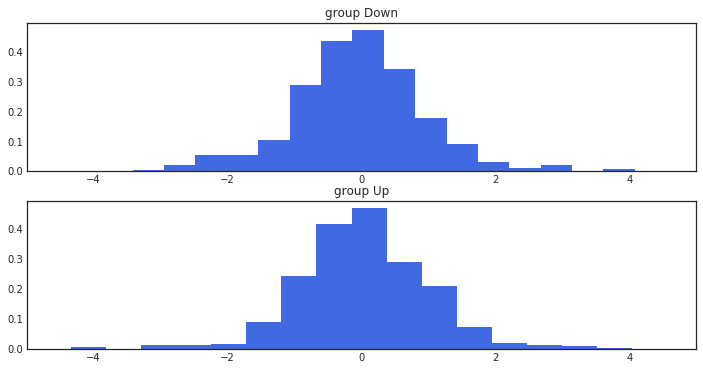

In [70]:
# Plot linear discriminants of the LDA training fit
smarket_grouped = smarket_train.groupby('Direction')
smarket_down = smarket_grouped.get_group('Down')
smarket_up = smarket_grouped.get_group('Up')
discrim_down = lda.transform(smarket_down[['Lag1', 'Lag2']])
discrim_up = lda.transform(smarket_up[['Lag1', 'Lag2']])
plt.figure(figsize=(12,6))
plt.subplot(2, 1, 1)
plt.hist(discrim_down, 16, density=True, color='royalblue')
plt.title('group Down')
plt.xlim(-5, 5)
plt.subplot(2, 1, 2)
plt.hist(discrim_up, 16, density=True, color='royalblue')
plt.title('group Up')
plt.xlim(-5, 5)
plt.show()

In [78]:
# Prediction on test subset
X = smarket_test[['Lag1', 'Lag2']]
y = smarket_test['Direction']
y_pred = lda.predict(X)

# Generate posterior probability matrix
posterior = pd.DataFrame(lda.predict_proba(X), columns=lda.classes_)

# Generate linear discriminants on the test subset
discrim_test = lda.transform(X)

cfmat_cnames = pd.MultiIndex.from_product([['Predict'], lda.classes_])
cfmat_index = pd.MultiIndex.from_product([['True'], lda.classes_])
cfmat = confusion_matrix(y, y_pred, labels=lda.classes_)
print("\nConfusion Matrix: ")
display(pd.DataFrame(cfmat, columns=cfmat_cnames, index=cfmat_index))
print('\nScore: ', lda.score(X, y))


Confusion Matrix: 


Predict     
             Down   Up
True Down      35   76
     Up        35  106


Score:  0.5595238095238095


In [79]:
# First 20 posterior probabilities
print('Posterior probabilities:')
print(posterior.iloc[:20])

# First 20 prediction results
print('\nFirst 20 prediction results: \n', y_pred[:20])

# Number of Down class with threshold changed to 0.9
print('\nNumber of Down class with threshold = 0.9: ', sum(posterior['Down'] > 0.9))

Posterior probabilities:
        Down        Up
0   0.490179  0.509821
1   0.479218  0.520782
2   0.466818  0.533182
3   0.474001  0.525999
4   0.492788  0.507212
5   0.493856  0.506144
6   0.495102  0.504898
7   0.487286  0.512714
8   0.490701  0.509299
9   0.484403  0.515597
10  0.490696  0.509304
11  0.511999  0.488001
12  0.489515  0.510485
13  0.470676  0.529324
14  0.474459  0.525541
15  0.479958  0.520042
16  0.493578  0.506422
17  0.503089  0.496911
18  0.497881  0.502119
19  0.488633  0.511367

First 20 prediction results: 
 ['Up' 'Up' 'Up' 'Up' 'Up' 'Up' 'Up' 'Up' 'Up' 'Up' 'Up' 'Down' 'Up' 'Up'
 'Up' 'Up' 'Up' 'Down' 'Up' 'Up']

Number of Down class with threshold = 0.9:  0


## Lab 4.6.4 Quadratic Discriminant Analysis

We will now fit a QDA model to the Smarket data. QDA is implemented in sklearn using the QuadraticDiscriminantAnalysis() function, which is again part of the discriminant_analysis module. The syntax is identical to that of LinearDiscriminantAnalysis().

In [80]:
features = ['Lag1', 'Lag2']
response = 'Direction'

# Fit on training subset
X = smarket_train[features]
y = smarket_train[response]
qda = QuadraticDiscriminantAnalysis()
qda.fit(X, y)

# Priors, group means, and coefficients of linear discriminants
priors = pd.DataFrame(qda.priors_, index=qda.classes_, columns=['']).T
print("Prior probabilities of groups:")
display(priors)
gmeans = pd.DataFrame(qda.means_, index=qda.classes_, columns=features)
print("\nGroup means:")
display(gmeans)
coef = pd.DataFrame(qda.scalings_, columns=['QD1', 'QD2'], index=features)
print("\nCoefficients of quadratic discriminants:")
display(coef)

Prior probabilities of groups:


,Down,Up
,0.491984,0.508016



Group means:


,Lag1,Lag2
Down,0.042790,0.033894
Up,-0.039546,-0.031325



Coefficients of quadratic discriminants:


,QD1,QD2
Lag1,1.562945,1.479273
Lag2,1.534551,1.472723


In [81]:
# Prediction on test data subset
X = smarket_test[features]
y = smarket_test[response]
y_pred = qda.predict(X)

# Evaluate accuracy
cfmat_cnames = pd.MultiIndex.from_product([['Predict'], qda.classes_])
cfmat_index = pd.MultiIndex.from_product([['True'], qda.classes_])
cfmat = confusion_matrix(y, y_pred, labels=qda.classes_)

print("\nConfusion Matrix: ")
display(pd.DataFrame(cfmat, columns=cfmat_cnames, index=cfmat_index))
print('\nScore: ', qda.score(X, y))


Confusion Matrix: 


Predict     
             Down   Up
True Down      30   81
     Up        20  121


Score:  0.5992063492063492


Interestingly, the QDA predictions are accurate almost 60% of the time, even though the 2005 data was not used to fit the model. This level of accuracy is quite impressive for stock market data, which is known to be quite hard to model accurately.

This suggests that the quadratic form assumed by QDA may capture the true relationship more accurately than the linear forms assumed by LDA and logistic regression. However, we recommend evaluating this method’s performance on a larger test set before betting that this approach will consistently beat the market!

## Lab 4.6.5 K-Nearest Neighbors (KNN) 

We will perform KNN clustering on the Smarket dataset from ISLR. This data set consists of percentage returns for the S&P 500 stock index over 1,250 days, from the beginning of 2001 until the end of 2005.


In [82]:
# Fit on training subset with K=1
features = ['Lag1', 'Lag2']
response = 'Direction'
K = 1
X = smarket_train[features] # matrix containing predictors associated with training data
y = smarket_train[response] # matrix containing response associated with training data
knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(X, y)

# Prediction on test data subset
X = smarket_test[features] # matrix containing predictors associated with test data
y = smarket_test[response]  
y_pred = knn.predict(X)

# Evaluate accuracy
cfmat_cnames = pd.MultiIndex.from_product([['Predict'], knn.classes_])
cfmat_index = pd.MultiIndex.from_product([['True'], knn.classes_])
cfmat = confusion_matrix(y, y_pred, labels=knn.classes_)

print("\nConfusion Matrix: ")
display(pd.DataFrame(cfmat, columns=cfmat_cnames, index=cfmat_index))
print('\nScore: ', knn.score(X, y))


Confusion Matrix: 


Predict    
             Down  Up
True Down      43  68
     Up        58  83


Score:  0.5


Results using K = 1 are not very good, since only 50% of observations are correctly predicted. Of course, it may be that K=1 results in an overly flexible fit to the data. Below we repeat the analysis using K = 3.

In [83]:
# Fit on training subset with K=3
features = ['Lag1', 'Lag2']
response = 'Direction'
K = 3
X = smarket_train[features]
y = smarket_train[response]
knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(X, y)

# Prediction on test data subset
X = smarket_test[features]
y = smarket_test[response]
y_pred = knn.predict(X)

# Evaluate accuracy
cfmat_cnames = pd.MultiIndex.from_product([['Predict'], knn.classes_])
cfmat_index = pd.MultiIndex.from_product([['True'], knn.classes_])
cfmat = confusion_matrix(y, y_pred, labels=knn.classes_)
print("\nConfusion Matrix: ")
display(pd.DataFrame(cfmat, columns=cfmat_cnames, index=cfmat_index))
print('\nScore: ', knn.score(X, y))


Confusion Matrix: 


Predict    
             Down  Up
True Down      48  63
     Up        55  86


Score:  0.5317460317460317


Results have improved slightly. We can try to perform a loop varying K from 1 to 10. It turns out that increasing *K* further provide no further improvements. It appears that the best results of the methods were achieved by QDA. 

## Lab 4.6.6 Application to Caravan Insurance Data

This data set includes 85 predictors that measure demographic characteristics for 5,822 individuals. The response variable is Purchase, which indicates whether or not a given individual purchases a caravan insurance policy. In this data set, only 6% of people purchased caravan insurance.

In [88]:
caravan = pd.read_csv('data/Caravan.csv')
caravan.head()

,Unnamed: 0,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,1,33,1,3,2,8,0,5,1,3,...,0,0,0,1,0,0,0,0,0,No
1,2,37,1,2,2,8,1,4,1,4,...,0,0,0,1,0,0,0,0,0,No
2,3,37,1,2,2,8,0,4,2,4,...,0,0,0,1,0,0,0,0,0,No
3,4,9,1,3,3,3,2,3,2,4,...,0,0,0,1,0,0,0,0,0,No
4,5,40,1,4,2,10,1,4,1,4,...,0,0,0,1,0,0,0,0,0,No


In [89]:
caravan["Purchase"].value_counts()

No     5474
Yes     348
Name: Purchase, dtype: int64

We need to **standardize the data** so that all variables are given **a mean of zero and a standard deviation of one**. Then all variables will be on a comparable scale. Otherwise predictors with higher values such as salary will drive the classification results and predictors with low values with have no effect.

The $\color{red}{scale()}$ function from SciKitLearn *preprocessing* module is a good way to standardize the data. We have to drop the column *Purchase* which is a qualitative variable.

We'll now split the observations into a test set, containing the first 1,000 observations, and a training set, containing the remaining observations.

In [90]:
# Scaling, train-test split, and building design matrcies
features = caravan.columns.drop('Purchase')
response = 'Purchase'

X_scaled = scale(caravan[features])
X_train = X_scaled[1000:]
y_train = caravan[response][1000:]
X_test = X_scaled[:1000]
y_test = caravan[response][:1000]

print("Training features shape: ", X_train.shape)
print("Test features shape: ", X_test.shape)

Training features shape:  (4822, 86)
Test features shape:  (1000, 86)


Below we fit a KNN model on the training data using K=1,3,5 and evaluate its performance on the test data

In [100]:
# KNN fit on training set with K=1,3,5 and predict on test set
for K in (1, 3, 5):
    print("\n======================\nK = {}:".format(K))
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    # Evaluate accuracy
    cfmat_cnames = pd.MultiIndex.from_product([['Predict'], knn.classes_])
    cfmat_index = pd.MultiIndex.from_product([['True'], knn.classes_])
    cfmat = confusion_matrix(y_test, y_pred, labels=knn.classes_)
    
    print("\nConfusion Matrix: ")
    display(pd.DataFrame(cfmat, columns=cfmat_cnames, index=cfmat_index))
    print('\nScore: ', knn.score(X_test, y_test))
    print('\nClassification Report:')
    print(classification_report(y_test, y_pred, digits=3))
    
    print("\nPercent of customers predicted to buy insurance that actually bought, TP/(TP+FP): {0:.3f}".format(cfmat[1][1]/(cfmat[1][1]+cfmat[0][1])))


K = 1:

Confusion Matrix: 


Predict    
              No Yes
True No      882  59
     Yes      48  11


Score:  0.893

Classification Report:
              precision    recall  f1-score   support

          No      0.948     0.937     0.943       941
         Yes      0.157     0.186     0.171        59

    accuracy                          0.893      1000
   macro avg      0.553     0.562     0.557      1000
weighted avg      0.902     0.893     0.897      1000


Percent of customers predicted to buy insurance that actually bought, TP/(TP+FP): 0.157

K = 3:

Confusion Matrix: 


Predict    
              No Yes
True No      921  20
     Yes      53   6


Score:  0.927

Classification Report:
              precision    recall  f1-score   support

          No      0.946     0.979     0.962       941
         Yes      0.231     0.102     0.141        59

    accuracy                          0.927      1000
   macro avg      0.588     0.540     0.552      1000
weighted avg      0.903     0.927     0.913      1000


Percent of customers predicted to buy insurance that actually bought, TP/(TP+FP): 0.231

K = 5:

Confusion Matrix: 


Predict    
              No Yes
True No      934   7
     Yes      55   4


Score:  0.938

Classification Report:
              precision    recall  f1-score   support

          No      0.944     0.993     0.968       941
         Yes      0.364     0.068     0.114        59

    accuracy                          0.938      1000
   macro avg      0.654     0.530     0.541      1000
weighted avg      0.910     0.938     0.918      1000


Percent of customers predicted to buy insurance that actually bought, TP/(TP+FP): 0.364


When K = 1, The KNN error rate on the 1,000 test observations is just under 12%. At first glance, this may appear to be fairly good. However, since only 6% of customers purchased insurance, we could get the error rate down to 6% by always predicting No regardless of the values of the predictors!

**So the overall error rate is not of interest. Instead, the fraction of individuals that are correctly predicted to buy insurance (precision or $\frac{TP}{TP+FP}$) is of interest.**

In [116]:
# Logistic regression on training set and predict on test set
logreg = LogisticRegression(C=1e9, max_iter=100)  # Large C to disable regularization
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# Evaluate accuracy
cfmat_cnames = pd.MultiIndex.from_product([['Predict'], logreg.classes_])
cfmat_index = pd.MultiIndex.from_product([['True'], logreg.classes_])
cfmat = confusion_matrix(y_test, y_pred, labels=logreg.classes_)

print("\nConfusion Matrix: ")
display(pd.DataFrame(cfmat, columns=cfmat_cnames, index=cfmat_index))
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits=3))

print("\nPercent of customers predicted to buy insurance that actually bought, \
TP/(TP+FP): {0:.3f}".format(cfmat[1][1]/(cfmat[1][1]+cfmat[0][1])))


Confusion Matrix: 


/home/ggbong/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Predict    
              No Yes
True No      935   6
     Yes      59   0


Classification Report:
              precision    recall  f1-score   support

          No      0.941     0.994     0.966       941
         Yes      0.000     0.000     0.000        59

    accuracy                          0.935      1000
   macro avg      0.470     0.497     0.483      1000
weighted avg      0.885     0.935     0.909      1000


Percent of customers predicted to buy insurance that actually bought, TP/(TP+FP): 0.000


In [107]:
# Generate predicts with decision threshold = 0.25
posterior = logreg.predict_proba(X_test)
Yes_idx = np.where(logreg.classes_ == 'Yes')[0][0]
y_pred = pd.Series(posterior[:, Yes_idx] > 0.25)
y_pred.replace([True, False], ['Yes', 'No'], inplace=True)

# Evaluate accuracy
cfmat = confusion_matrix(y_test, y_pred, labels=logreg.classes_)
print("\nConfusion Matrix: ")
display(pd.DataFrame(cfmat, columns=cfmat_cnames, index=cfmat_index))
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits=3))

print("\nPercent of customers predicted to buy insurance that actually bought,\
 TP/(TP+FP): {0:.3f}".format(cfmat[1][1]/(cfmat[1][1]+cfmat[0][1])))


Confusion Matrix: 


Predict    
              No Yes
True No      920  21
     Yes      48  11


Classification Report:
              precision    recall  f1-score   support

          No      0.950     0.978     0.964       941
         Yes      0.344     0.186     0.242        59

    accuracy                          0.931      1000
   macro avg      0.647     0.582     0.603      1000
weighted avg      0.915     0.931     0.921      1000


Percent of customers predicted to buy insurance that actually bought, TP/(TP+FP): 0.344


# EXERCISES

## *Conceptual*

1. Simple algebra to prove that the logistic function representation is equal to logit representation. 

$ p(X) = \frac{e^{\beta_0+\beta_1X}}{1 + e^{\beta_0+\beta_1X}}$         Eq. (4.2)

$\frac{p(X)}{1-p(X)} = e^{\beta_0+\beta_1X}$            Eq. (4.3)

To do this: we can assign $b = e^{\beta_0+\beta_1X}$, and get:

$ p(X)(1+b) = b$

$p(X) + p(X)b = b$

$p(X) = b(1-p(X)$

$\frac{p(X)}{1-p(X)} = b = e^{\beta_0+\beta_1X}$

2. Show that the for Linear Discriminant analysis, under the assumption that the observations in the kth class are drawn from a normal distribution $N(\mu_k,\sigma^2)$, the Bayes' classifier assigns an observation to the class for which the discriminant function (4.13) is maximized. This is similar to classifying an observation to the class for which (4.12) is largest. The top is (4.12) which is the probability for each class while the bottom is (4.13).

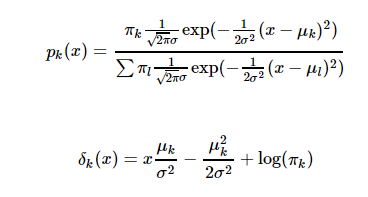

3. Show that for Quadratic Discriminant Analysis model when number of feature = 1, and number of classes = *k*, the discriminant function which is derived from the density function for normal distribution is not linear. In other words, show that the Bayes classifier is not linear and is in fact quadratic.

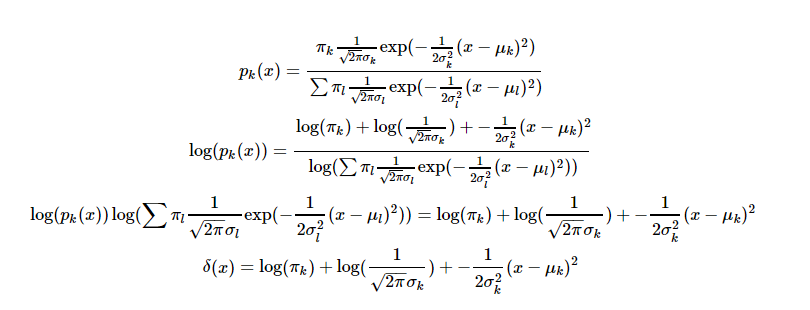

4. When number of features, p, is large, there is a deterioration in the performance of KNN and other *local* approaches, that perform prediction using observations near the test observation for which a prediction must be made. This is also called the *curse of dimensionality* and ties in with the fact that non-parametric approaches often perform poorly when *p* is large. 

4a) The probability of drawing a value between 0.55 and 0.65 from a uniform distribution [0,1] is 10%.

4b) Probability of drawing between [0.55, 0.65] from $X_1$ and drawing between [0.3, 0.4] from $X_2$ is 0.1 * 0.1 = 0.01 or 1%

4c) The probability of being able to predict a response using observations within 10% of each feature's range closest to the test observation, when number of features= 100 is very very low.
$p = 0.1^{100}=10^{-98}\%$

4d) As number of features, p, increases, the number of points near an observation decreases exponentially.

4e) 

$p=1$ , $l=0.10$

$p=2, l=\sqrt{0.10}=0.32$

$p=3, l=0.10^{\frac{1}{3}}=0.46$

$p=N, l=0.10^{\frac{1}{N}}$

As we can see the hypercube gets exponentially bigger as N increases


5a) If the Bayes decision boundary is linear, we expeect QDA to perform better on the training set as it is more flexible but LDA will perform better on unseen test set as QDA might be overfit to the training data. 

5b) If Bayes decision boundary is non-linear, QDA will perform better on both training and test set and the bias will be reduced significantly by adding non-linearity to the model, the bias will decrease much more than the minor increase in variance. 

5c) As sample size, n, increases, the variance of the model will be decreased (as the train data will be more representative of the population and less prone to large influence by a small number of outliers), thus we expect the prediction accuracy of QDA relative to LDA to improve. When n is small, the variance of the QDA model is higher than LDA, but the bias of QDA is lower than LDA. As n increases, higher variance of QDA will be offset by more sample, and QDA being a more flexible method will yield better fit (bias low), thus prediction accuracy of QDA relative to LDA will increase.

5d) False. The QDA might be too flexible and overfit the training data especially if sample size is small, so even though its training performance might be superior, the performance on unseen test data might suffer. 

6a) The probability for an observation to be in a class is given by p(X). Plugging in $\hat{\beta}_0$, $\hat{\beta}_1$, $\hat{\beta}_2$ into the logistic regression equation, we can calculate the probability that a student gets A (response variable) given that GPA = 3.5, studies = 40 h. 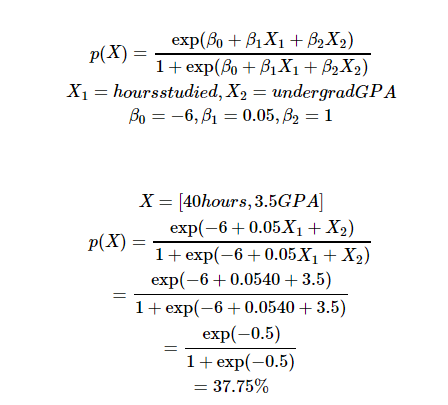

6b) To calculate the number of hours, $X_1$ a student with GPA of 3.5, $X_2$, will need to get a 50% chance, $p(X)$, of getting an A: 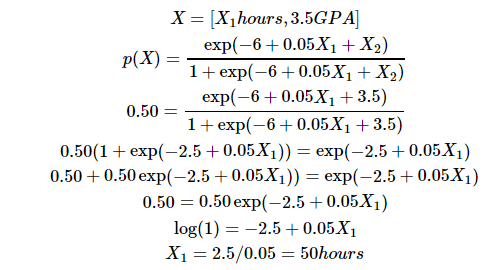

7) Plugging in variables into Equation (4.12), see question 3, to get probability of getting a yes, $p_{yes}(X)$ 

8) Given: Logistic regression: 20% training error rate, 30% test error rate KNN(K=1): average error rate of 18%

**For KNN with K=1, the training error rate is 0% because for any training observation, its nearest neighbor will be the response itself**. So, KNN has a test error rate of 36%. I would choose logistic regression because of its lower test error rate of 30%.

9) *Odds*. What percentage of people with an odds of 0.37 of defaulting will in fact default? 

$Odd = 0.37 = \frac{p(X)}{1-p(X)}$

p(X) = 0.27

9b) if $p(X) = 0.16$, $Odds = \frac{p(X)}{1-p(X)} = 0.19$ 

10. This question is answered using the Weekly data set. This data is similar in nature to the market data from the above lab, except it contains 1089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010. 

In [121]:
df = pd.read_csv('data/Weekly.csv')
df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [127]:
df.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


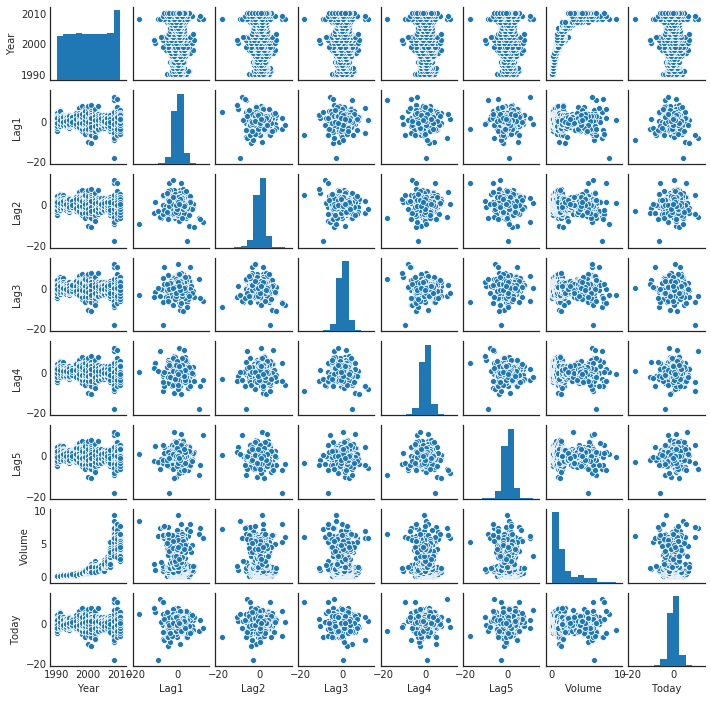

In [126]:
sns.pairplot(df, aspect = 1, height = 1.2)

There appears to be some correlation between Year and Volume. No other trends observed. 

In [128]:
# Logistic regression by GLM
formula = 'Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume'
weekly_glm = smf.glm(formula, data=df, family=sm.families.Binomial()).fit() 

print('Deviance Residuals:')
display(weekly_glm.resid_deviance.describe())
print(weekly_glm.summary())
print('\n    Null deviance: {0:.1f} on {1} degrees of freedom'.format(weekly_glm.null_deviance, weekly_glm.df_model+weekly_glm.df_resid))
print('Residual deviance: {0:.1f} on {1} degrees of freedom'.format(weekly_glm.deviance, weekly_glm.df_resid))
print('AIC: {0:.2f}'.format(weekly_glm.aic))                

Deviance Residuals:


count    1089.000000
mean       -0.036122
std         1.168260
min        -1.457925
25%        -1.084873
50%        -0.991291
75%         1.256536
max         1.694940
dtype: float64

                          Generalized Linear Model Regression Results                           
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                 1089
Model:                                              GLM   Df Residuals:                     1082
Model Family:                                  Binomial   Df Model:                            6
Link Function:                                    logit   Scale:                          1.0000
Method:                                            IRLS   Log-Likelihood:                -743.18
Date:                                  Sat, 02 May 2020   Deviance:                       1486.4
Time:                                          22:46:15   Pearson chi2:                 1.09e+03
No. Iterations:                                       4                                         
Covariance Type:                              nonrobust                                         
                 coef    std e

The variable Lag2 has the lowest p-value, less than 0.05, and is statistically significant. 

In [135]:
# Specify features and response
features = ['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']
response = 'Direction'

# Fit on training data subset using sklearn
X = df[features]
y = df[response]
logreg = LogisticRegression(C=1e9)  # Use a large C to disable regularization
logreg.fit(X, y)

# Prediction on test data subset using sklearn
y_pred = logreg.predict(X)

# Evaluate accuracy
cfmat_cnames = pd.MultiIndex.from_product([['Predict'], logreg.classes_])
cfmat_index = pd.MultiIndex.from_product([['True'], logreg.classes_])
cfmat = confusion_matrix(y, y_pred, labels=logreg.classes_)
print("\nConfusion Matrix: ")
display(pd.DataFrame(cfmat, columns=cfmat_cnames, index=cfmat_index))


Confusion Matrix: 


Predict     
             Down   Up
True Down      54  430
     Up        48  557

Percentage of currect predictions: (54+557)/(54+557+48+430) = 56.1%. Weeks the market goes up the logistic regression is right most of the time, 557/(557+48) = 92.1%. Weeks the market goes down the logistic regression is wrong most of the time 54/(430+54) = 11.2%.

10d) Repeat the Logistic Regression using Lag2 as the only predictor

In [131]:
# Manual train-test split
weekly_train = df[df.Year<=2004]
weekly_test = df[df.Year>=2009]
print("Training dataset shape: ", weekly_train.shape)
print("Test dataset shape: ", weekly_test.shape)

Training dataset shape:  (776, 9)
Test dataset shape:  (104, 9)


In [136]:
# Specify features and response
features = ['Lag2']
response = 'Direction'

# Fit on training data subset using sklearn
X_train = weekly_train[features]
y_train = weekly_train[response]
logreg = LogisticRegression(C=1e9)  # Use a large C to disable regularization
logreg.fit(X_train, y_train)

# Prediction on test data subset using sklearn
X_test = weekly_test[features]
y_test = weekly_test[response]
y_pred = logreg.predict(X_test)

# Evaluate accuracy
cfmat_cnames = pd.MultiIndex.from_product([['Predict'], logreg.classes_])
cfmat_index = pd.MultiIndex.from_product([['True'], logreg.classes_])
cfmat = confusion_matrix(y_test, y_pred, labels=logreg.classes_)
print("\nConfusion Matrix: ")
display(pd.DataFrame(cfmat, columns=cfmat_cnames, index=cfmat_index))


Confusion Matrix: 


Predict    
             Down  Up
True Down       6  37
     Up         3  58

Percentage of correct predictions: (6+58)/(6+58+37+3) = 61.5%

10e) Repeat using LDA

In [137]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Priors, group means, and coefficients of linear discriminants
priors = pd.DataFrame(lda.priors_, index=lda.classes_, columns=['']).T
print("Prior probabilities of groups:")
display(priors)

gmeans = pd.DataFrame(lda.means_, index=lda.classes_, columns=features)
print("\nGroup means:")
display(gmeans)

coef = pd.DataFrame(lda.scalings_, columns=['LD1'], index=features) # Note this is different from model.coef_
print("\nCoefficients of linear discriminants:")
display(coef)

Prior probabilities of groups:


,Down,Up
,0.44201,0.55799



Group means:


,Lag2
Down,0.058840
Up,0.294734



Coefficients of linear discriminants:


,LD1
Lag2,0.467561


In [138]:
y_pred = lda.predict(X_test)

# Generate posterior probability matrix
posterior = pd.DataFrame(lda.predict_proba(X_test), columns=lda.classes_)

# Generate linear discriminants on the test subset
discrim_test = lda.transform(X_test)

cfmat_cnames = pd.MultiIndex.from_product([['Predict'], lda.classes_])
cfmat_index = pd.MultiIndex.from_product([['True'], lda.classes_])
cfmat = confusion_matrix(y_test, y_pred, labels=lda.classes_)
print("\nConfusion Matrix: ")
display(pd.DataFrame(cfmat, columns=cfmat_cnames, index=cfmat_index))
print('\nScore: ', lda.score(X_test, y_test))


Confusion Matrix: 


Predict    
             Down  Up
True Down       6  37
     Up         3  58


Score:  0.6153846153846154


Percentage of correct predictions: (6+58)/(6+58+37+3) = 61.5%. Same as Logistic Regression. 

10.f) Repeat using QDA

In [146]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

# Priors, group means, and coefficients of linear discriminants
priors = pd.DataFrame(qda.priors_, index=qda.classes_, columns=['']).T
print("Prior probabilities of groups:")
display(priors)
gmeans = pd.DataFrame(qda.means_, index=qda.classes_, columns=features)
print("\nGroup means:")
display(gmeans)

Prior probabilities of groups:


,Down,Up
,0.44201,0.55799



Group means:


,Lag2
Down,0.058840
Up,0.294734


In [147]:
y_pred = qda.predict(X_test)

# Evaluate accuracy
cfmat_cnames = pd.MultiIndex.from_product([['Predict'], qda.classes_])
cfmat_index = pd.MultiIndex.from_product([['True'], qda.classes_])
cfmat = confusion_matrix(y_test, y_pred, labels=qda.classes_)

print("\nConfusion Matrix: ")
display(pd.DataFrame(cfmat, columns=cfmat_cnames, index=cfmat_index))
print('\nScore: ', qda.score(X_test, y_test))


Confusion Matrix: 


Predict    
             Down  Up
True Down       0  43
     Up         0  61


Score:  0.5865384615384616


A correctness of 58.7% even though it picked Up the whole time!

10g) Repeat using KNN with k = 1

In [149]:
# Number of neighbors = 1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluate accuracy
cfmat_cnames = pd.MultiIndex.from_product([['Predict'], knn.classes_])
cfmat_index = pd.MultiIndex.from_product([['True'], knn.classes_])
cfmat = confusion_matrix(y_test, y_pred, labels=knn.classes_)

print("\nConfusion Matrix: ")
display(pd.DataFrame(cfmat, columns=cfmat_cnames, index=cfmat_index))
print('\nScore: ', knn.score(X_test, y_test))
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits=3))


Confusion Matrix: 


Predict    
             Down  Up
True Down      23  20
     Up        27  34


Score:  0.5480769230769231

Classification Report:
              precision    recall  f1-score   support

        Down      0.460     0.535     0.495        43
          Up      0.630     0.557     0.591        61

    accuracy                          0.548       104
   macro avg      0.545     0.546     0.543       104
weighted avg      0.559     0.548     0.551       104



10h) Which of the above methods appear to be best?

Logistic regression and LDA methods provide similar test error rates.

10i) Experiment with different combinations of predictors including transformation

In [150]:
# Number of neighbors = 10
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluate accuracy
cfmat_cnames = pd.MultiIndex.from_product([['Predict'], knn.classes_])
cfmat_index = pd.MultiIndex.from_product([['True'], knn.classes_])
cfmat = confusion_matrix(y_test, y_pred, labels=knn.classes_)

print("\nConfusion Matrix: ")
display(pd.DataFrame(cfmat, columns=cfmat_cnames, index=cfmat_index))
print('\nScore: ', knn.score(X_test, y_test))
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits=3))


Confusion Matrix: 


Predict    
             Down  Up
True Down      25  18
     Up        28  33


Score:  0.5576923076923077

Classification Report:
              precision    recall  f1-score   support

        Down      0.472     0.581     0.521        43
          Up      0.647     0.541     0.589        61

    accuracy                          0.558       104
   macro avg      0.559     0.561     0.555       104
weighted avg      0.575     0.558     0.561       104



In [156]:
# Create training and test data using two new predictors
df['sqrt_abs_Lag2'] = np.sqrt(abs(df['Lag2']))
df['Lag1:Lag2'] = df['Lag1'] * df['Lag2']

weekly_train = df[df.Year<=2004]
weekly_test = df[df.Year>=2009]
features = ['Lag2','sqrt_abs_Lag2', 'Lag1:Lag2']
response = 'Direction'

# Fit on training data subset using sklearn
X_train = weekly_train[features]
y_train = weekly_train[response]
logreg = LogisticRegression(C=1e9)  # Use a large C to disable regularization
logreg.fit(X_train, y_train)

# Prediction on test data subset using sklearn
X_test = weekly_test[features]
y_test = weekly_test[response]
y_pred = logreg.predict(X_test)

# Evaluate accuracy
cfmat_cnames = pd.MultiIndex.from_product([['Predict'], logreg.classes_])
cfmat_index = pd.MultiIndex.from_product([['True'], logreg.classes_])
cfmat = confusion_matrix(y_test, y_pred, labels=logreg.classes_)
print("\nConfusion Matrix: ")
display(pd.DataFrame(cfmat, columns=cfmat_cnames, index=cfmat_index))
print('\nScore: ', logreg.score(X_test, y_test))
print('\nClassification Report:')
print(classification_report(y_test, y_pred, digits=3))


Confusion Matrix: 


Predict    
             Down  Up
True Down       1  42
     Up         1  60


Score:  0.5865384615384616

Classification Report:
              precision    recall  f1-score   support

        Down      0.500     0.023     0.044        43
          Up      0.588     0.984     0.736        61

    accuracy                          0.587       104
   macro avg      0.544     0.503     0.390       104
weighted avg      0.552     0.587     0.450       104



Adding the predictor Lag1:Lag2 and sqrt(Lag2) to Lag2 did not appear to improve the score for Logistic Regression. Trying KNN with 10 neighbors only improved the score slightly versus using 1 neighbor 